In [51]:
import pandas as pd
import os
import numpy as np

In [16]:
os.getcwd()
os.chdir('/home/pi/dev/notebooks/30DayMap2024/data/kzoo_street_12225')
os.getcwd()

'/home/pi/dev/notebooks/30DayMap2024/data/kzoo_street_12225'

In [21]:
dirs = os.listdir()
# os.chdir(dirs[0])
os.getcwd()
os.listdir()

['1861928_West_Main_Street_corridor_study.csv',
 'Shapefile',
 'Analysis Details']

In [137]:
files = os.listdir()
df = pd.read_csv(files[0])
df.describe()

,Zone ID,Line Zone Length (Miles),Zone Direction (degrees),Average Daily Segment Traffic (StL Volume),Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Vehicle Miles of Travel (StL Volume),Travel Time Index,85th Speed Percentile
count,4.770000e+03,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000,4770.000000
mean,1.123988e+09,0.066000,96.396226,1212.854088,37.665828,6.518449,43.242906,83.758958,1.155216,45.179665
std,7.900806e+06,0.054483,5.922565,2299.468014,4.436106,5.694849,3.763937,230.909422,0.095134,3.199884
min,1.111504e+09,0.012000,88.000000,21.000000,19.000000,1.000000,21.797000,0.360000,0.990000,30.000000
25%,1.117696e+09,0.031000,92.000000,228.000000,36.000000,3.000000,42.866000,9.462500,1.090000,44.000000
50%,1.125207e+09,0.053000,94.000000,647.000000,39.000000,5.000000,43.799000,25.820000,1.130000,45.000000
75%,1.130343e+09,0.079000,100.000000,905.750000,40.000000,8.000000,44.835000,64.947500,1.180000,47.000000
max,1.136272e+09,0.288000,112.000000,17452.000000,46.000000,33.000000,47.425000,4593.150000,1.640000,53.000000


In [96]:
c = df.columns
# head & tail
df.head()
df.tail(2)
# indexing
df[4768:4770]
l = df.__len__()
df[l-5:l]
df[:2]
# accessing values as array
arr = df['Zone ID'].array
arr[:5]
# as numpy array
arr_np = np.asarray(df['Zone ID'])
arr_np[:5]
df_np = df.to_numpy()
type(df_np[0])
# filling null values
df.isnull().sum()
# fill NaN with '0'
df.fillna(0)
df['Avg Segment Speed (mph)'].describe()
avg_sp = df['Avg Segment Speed (mph)']
avg_sp.value_counts()
# row or colmnwise functions
avg_sp.apply(lambda x: np.mean(x))
#  
df['Avg Segment Speed (mph)'].apply(lambda x: x/100)
df.apply(lambda row: row[c[13]] * 1000, axis=1)


0       40000
1       40000
2       41000
3       41000
4       41000
        ...  
4765    19000
4766    19000
4767    19000
4768    19000
4769    19000
Length: 4770, dtype: int64

In [102]:
zones = df['Zone ID']
zones.unique()
df['Day Part'].unique()
df.head(2)

,Data Periods,Mode of Travel,Zone ID,Zone Name,Road Classification,Line Zone Length (Miles),Zone Is Pass Through,Zone Direction (degrees),Zone Cardinal Direction,Zone is Bi-Direction,Day Type,Day Part,Average Daily Segment Traffic (StL Volume),Avg Segment Speed (mph),Avg Segment Travel Time (sec),Free Flow Speed (mph),Vehicle Miles of Travel (StL Volume),Travel Time Index,Congested Segment,85th Speed Percentile
0,"Jan 01, 2022 - Dec 31, 2023",All Vehicles - StL All Vehicles Volume,1111503841,West Main Street / 111568112 / 7,Primary,0.031,yes,92,EAST,yes,0: All Days (M-Su),00: All Day (12am-12am),11509,40,3,44.303,360.04,1.12,False,45
1,"Jan 01, 2022 - Dec 31, 2023",All Vehicles - StL All Vehicles Volume,1111503841,West Main Street / 111568112 / 7,Primary,0.031,yes,92,EAST,yes,0: All Days (M-Su),01: 12am (12am-1am),125,40,3,44.303,3.92,1.09,False,46


In [ ]:
df.groupby('Day Part')[[c[13]]].count()

In [198]:
# df.filter(like='00: All Day (12am-12am)	', axis=1)
df_all = df[df['Day Part'] == '00: All Day (12am-12am)']
c = df_all.columns
df_all.head(2)
df_at = df_all[[c[2], c[10], c[11], c[12], c[13]]]
df_at.head()

,Zone ID,Day Type,Day Part,Average Daily Segment Traffic (StL Volume),Avg Segment Speed (mph)
0,1111503841,0: All Days (M-Su),00: All Day (12am-12am),11509,40
30,1111503841,1: Weekday (M-F),00: All Day (12am-12am),12367,40
60,1111503841,2: Weekend Day (Sa-Su),00: All Day (12am-12am),9385,40
90,1111754274,0: All Days (M-Su),00: All Day (12am-12am),11450,37
120,1111754274,1: Weekday (M-F),00: All Day (12am-12am),12194,37


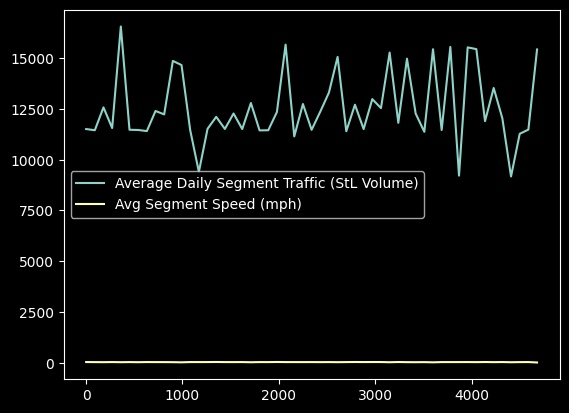

In [182]:
import matplotlib.pyplot as plt
df_alldays_spd = df_at[df_at['Day Type'] == '0: All Days (M-Su)']
plt.style.use('dark_background')
# ax = df_alldays_spd['Avg Segment Speed (mph)'].plot()
ax = df_alldays_spd[['Average Daily Segment Traffic (StL Volume)', 'Avg Segment Speed (mph)']].plot()

/tmp/ipykernel_355620/1956571162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alldays_spd['seg_norm'] = df_alldays_spd.apply(lambda row: row['Average Daily Segment Traffic (StL Volume)'] / 200, axis=1)


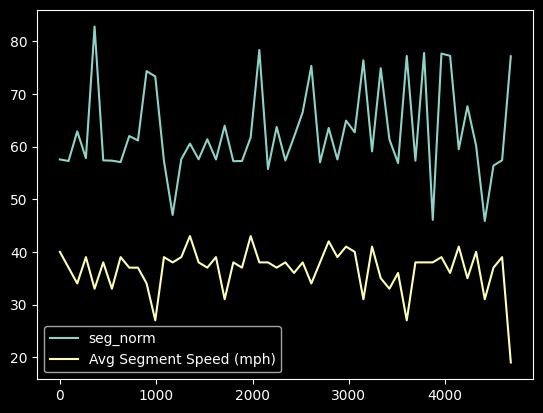

In [197]:
df_alldays_spd['seg_norm'] = df_alldays_spd.apply(lambda row: row['Average Daily Segment Traffic (StL Volume)'] / 200, axis=1)
df_alldays_spd.head()
ax = df_alldays_spd[['seg_norm', 'Avg Segment Speed (mph)']].plot()

<Axes: xlabel='Average Daily Segment Traffic (StL Volume)', ylabel='Avg Segment Speed (mph)'>

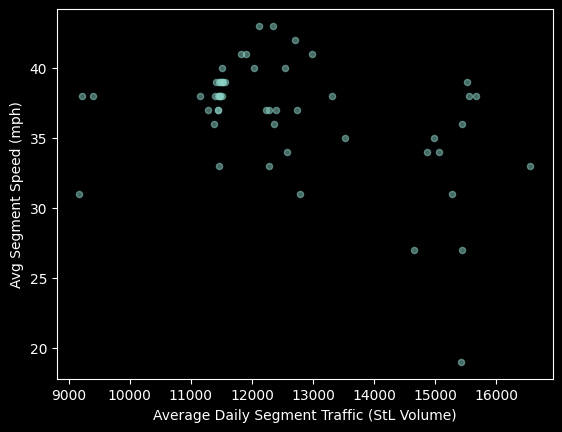

In [181]:
df_alldays_spd.plot.scatter(x='Average Daily Segment Traffic (StL Volume)', y="Avg Segment Speed (mph)", alpha=0.5)

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

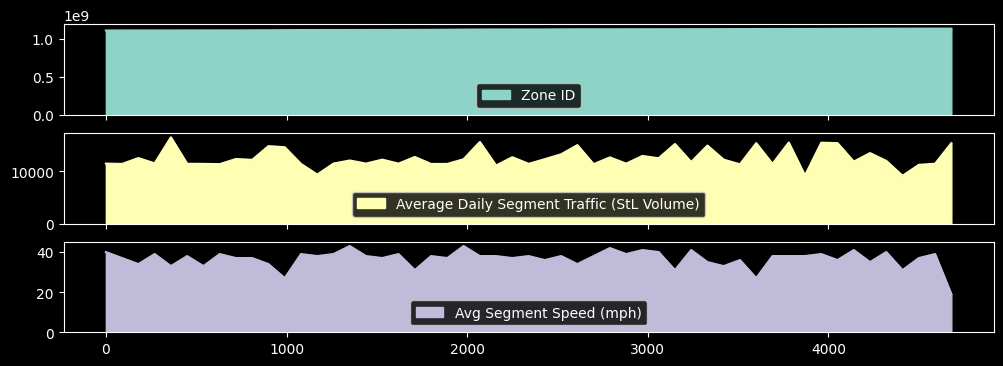

In [183]:
df_alldays_spd.plot.area(figsize=(12, 4), subplots=True)

# Geo Analysis

In [202]:
df_alldays_spd.head()

,Zone ID,Day Type,Day Part,Average Daily Segment Traffic (StL Volume),Avg Segment Speed (mph),seg_norm
0,1111503841,0: All Days (M-Su),00: All Day (12am-12am),11509,40,57.545
90,1111754274,0: All Days (M-Su),00: All Day (12am-12am),11450,37,57.250
180,1111871475,0: All Days (M-Su),00: All Day (12am-12am),12575,34,62.875
270,1112032394,0: All Days (M-Su),00: All Day (12am-12am),11558,39,57.790
360,1112161013,0: All Days (M-Su),00: All Day (12am-12am),16557,33,82.785
